# Utilisation cv2

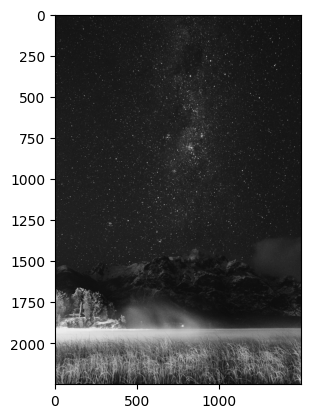

(2250, 1500, 3)

In [17]:
import cv2

import matplotlib.pyplot as plt 

image = cv2.imread('guille-pozzi-SHcHVFhz7-M-unsplash.jpg')
# img couleur
imgcolor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# img gris
gray_img=cv2.cvtColor(imgcolor, cv2.COLOR_RGB2GRAY)
# cv2.imwrite('imgaewritten.png', imgcolor)
plt.imshow(gray_img, cmap='gray')
plt.show()
imgcolor.shape


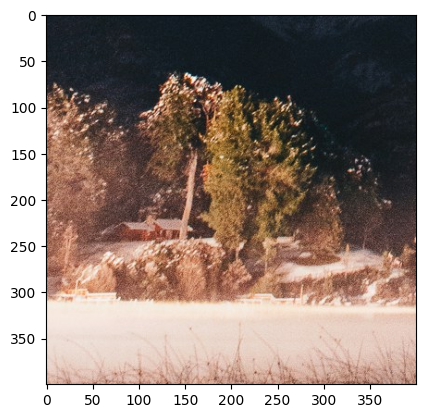

In [20]:
# rogner l'image 

# Lisez l'image
image = cv2.imread('imgaewritten.png')

# Définissez les coordonnées de la région d'intérêt (ROI)
x = 0
y = 1600
w = 400
h = 400

# Rognez l'image
imgrognee = image[y:y+h, x:x+w]
plt.imshow(imgrognee, cmap="gray")
# Écrivez l'image rognée dans un fichier
# cv2.imwrite('image_rognée.jpg', imgrognee)

# Exo filtres



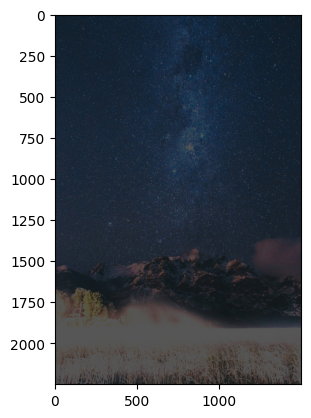

In [21]:
# threshold trunc
ret, seuillage_image = cv2.threshold(image, 86,255,cv2.THRESH_TRUNC)
plt.imshow(seuillage_image)

In [23]:
# treshold otsu impossible sur les images 3channels, c'est seulement pour les image en gris
ret, ad = cv2.threshold(image, 86,255,cv2.THRESH_OTSU)
plt.imshow(ad)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


# Threshold otsu

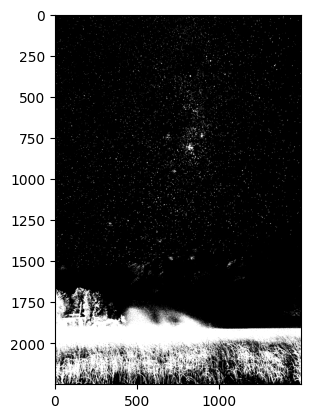

In [25]:
ret, ad = cv2.threshold(gray_img, 86,255,cv2.THRESH_OTSU)
plt.imshow(ad, cmap="gray")

In [27]:
# canny
from __future__ import print_function
import cv2 as cv
import argparse
max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv.blur(src_gray, (3,3))
    detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv.imshow(window_name, dst)
parser = argparse.ArgumentParser(description='Code for Canny Edge Detector tutorial.')
parser.add_argument('--input', help='Path to input image.', default='fruits.jpg')
args = parser.parse_args()
src = cv.imread(cv.samples.findFile(args.input))
if src is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
cv.namedWindow(window_name)
cv.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(0)
cv.waitKey()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'Canny'
> Overload resolution failed:
>  - Canny() missing required argument 'threshold2' (pos 3)
>  - Canny() missing required argument 'threshold2' (pos 3)
>  - Canny() missing required argument 'dy' (pos 2)
>  - Canny() missing required argument 'dy' (pos 2)


# Floutage


In [33]:
# we define a function to display the image
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

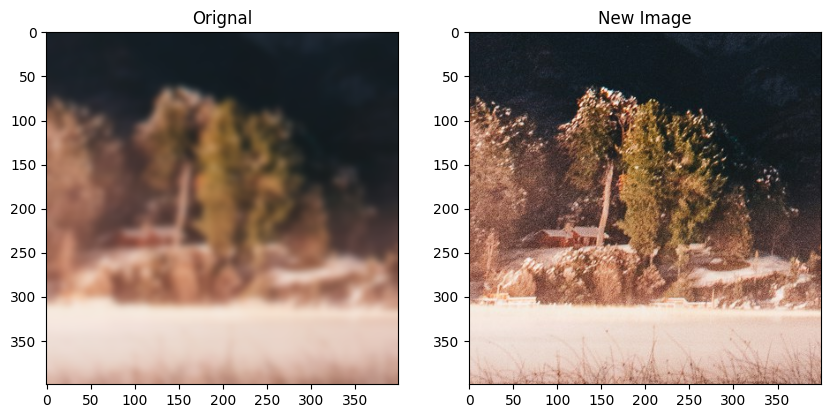

In [34]:
# Gaussian blur
imgfloue = cv2.GaussianBlur(imgrognee,(401,401),sigmaX=4,sigmaY=4)

plot_image(imgrognee, imgfloue)

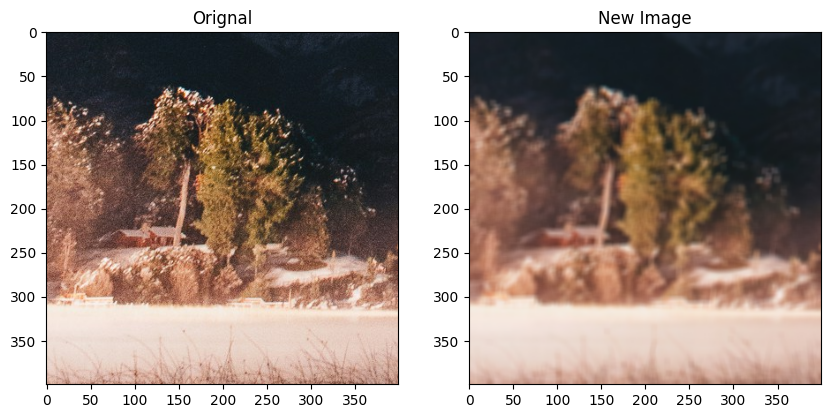

In [37]:
# image flou moyen
blurred_image = cv2.blur(imgrognee, (7, 7))
plot_image(imgrognee, blurred_image)

In [ ]:
blurred_image = cv2.bilateralFiltering(image, 9, 75, 75)

# Contours / Edges

In [ ]:
ddepth = cv2.CV_16S 
grad_x= cv2.Sobel(imgfloue, ddepth, dx=1, dy=0, ksize=3)

grad_y= cv2.Sobel(imgfloue, ddepth, dx=0, dy=1, ksize=3)

plt.imshow(grad_y, cmap="gray")

abs_grad_x= cv2.convertScaleAbs(grad_x)
abs_grad_y= cv2.convertScaleAbs(grad_y)
grad=cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)
plt.figure(figsize=(10,10))
plt.imshow(grad, cmap="gray")